In [1]:
# For debug
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GenPosition import *

In [17]:
# Read factor exposure and historical factor returns
fr = pd.read_csv('./temp_0/factor_return_20150102.csv')
fx = pd.read_csv('./temp_0/factor_exposure_20150102.csv')
# fr = pd.read_csv('./factor_exposure_and_return_data/factor_return_20150102.csv')
# fx = pd.read_csv('./factor_exposure_and_return_data/factor_exposure_20150102.csv')

stock_list, w_opt = GenPosition(fr, fx, U=0.2)

w_opt = PositionFilter(w_opt)

ptfl = pd.DataFrame({"ticker": stock_list, "weight": list(w_opt.T[0])})
ptfl_ = ptfl[ptfl['weight'] != 0]
print(ptfl_)

    ticker  weight
317    MCD     0.2
325     MO     0.2
342    NKE     0.2
386     PM     0.2
495    USB     0.2


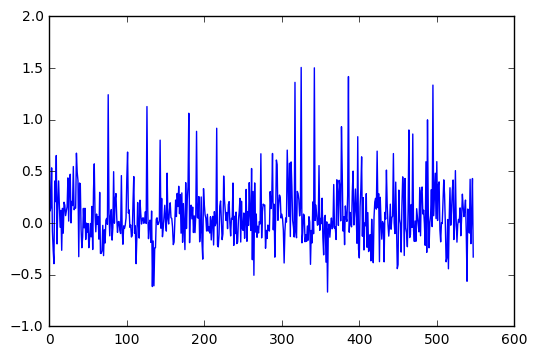

In [9]:
tk = ptfl_['ticker']
ret, sigma, stock_list = stock_ret_est.GenReturn(fr, fx)

plt.plot(ret)
plt.show()

In [10]:
fx.ix[tk.index]

,date,ticker,momentum,market_cap,vol10,beta
317,1/2/2015,MCD,-0.091678,3.000000,-0.539200,-0.119815
325,1/2/2015,MO,0.542545,3.000000,-0.509851,-0.082875
342,1/2/2015,NKE,0.964111,2.832736,-0.385240,-0.083678
386,1/2/2015,PM,0.121280,3.000000,-0.491177,-0.080901
495,1/2/2015,USB,0.098533,2.770186,-0.533413,-0.030075


In [11]:
fr_m = fr.mean()
fr_m

momentum      0.206370
market_cap    0.458615
vol10        -0.109356
beta          0.449495
dtype: float64

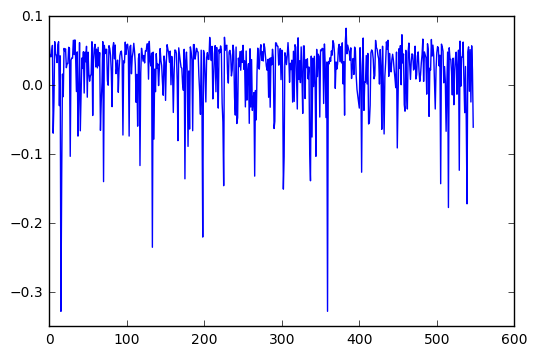

In [12]:
plt.plot(fx['vol10'] * fr_m['vol10'])
plt.show()

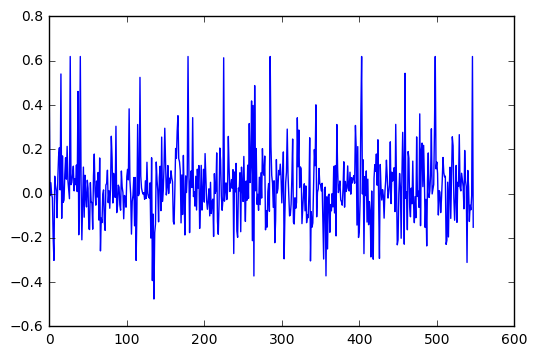

In [13]:
plt.plot(fx['momentum'] * fr_m['momentum'])
plt.show()

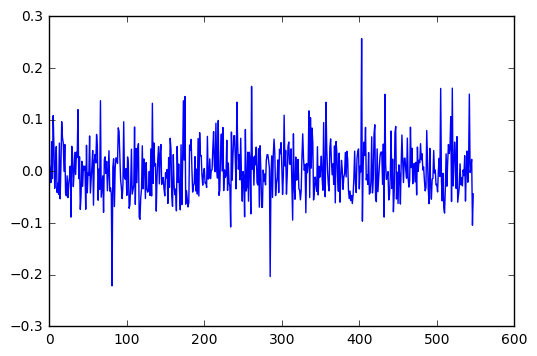

In [14]:
plt.plot(fx['beta'] * fr_m['beta'])
plt.show()

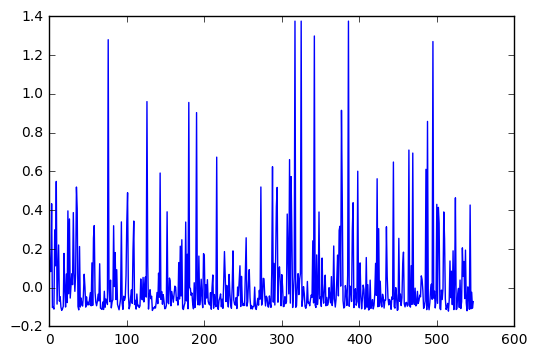

In [15]:
plt.plot(fx['market_cap'] * fr_m['market_cap'])
plt.show()